## 对京东商城的单日销售量进行预测
机器学习中时间序列预测的方法有很多，在本实验中我们采用 Prophet: Facebook研究团队开发的知名时间序列软件包实现，参见：https://facebook.github.io/prophet/.

## 使用Prophet完成京东商城未来7天销售量的预测

- import some libs and config

In [1]:
import pandas as pd
from prophet import Prophet
from tqdm import tqdm
import pathlib

# ! change it to your specific path :D
ROOT = pathlib.Path('/home/qdl/Desktop/FDU/分布式/DATA/')

timeseries = [
    'time-sale_day',
    'time-sale_hour',
    'time-sale_min'
]

configs = [
    {'periods': 7, 'freq':'D'},
    {'periods': 7*24, 'freq':'H'},
    {'periods': 7*24, 'freq':'H'},
]

Importing plotly failed. Interactive plots will not work.


- read data in all timeseries 

In [2]:
dfs = list(
   pd.read_csv(ROOT / 'Time-Sale/' / ts, names=['ds', 'y']) 
   for ts in timeseries
)
dfs[0].head()

,ds,y
0,2016-03-12,782
1,2016-03-13,574
2,2016-03-14,1929
3,2016-03-15,2915
4,2016-03-16,1071


- fit models

In [3]:
models = list()
for ts, df in zip(tqdm(timeseries), dfs):
    model = Prophet()
    print('fit model in timeseries: {}'.format(ts))
    model.fit(df)
    models.append(model)

  0%|          | 0/3 [00:00<?, ?it/s]19:43:57 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing
19:43:57 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing
19:43:57 - cmdstanpy - INFO - Chain [1] start processing


fit model in timeseries: time-sale_day
fit model in timeseries: time-sale_hour
fit model in timeseries: time-sale_min


19:43:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:00<00:00,  5.90it/s]


- construct future data

In [4]:
futures = list() 
for (model, args) in zip(models, configs):
  future = model.make_future_dataframe(**args)
  future.tail()
  futures.append(future)

- prediction

In [5]:
forecasts = list()
for model, future in zip(models, futures):
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)

- plot

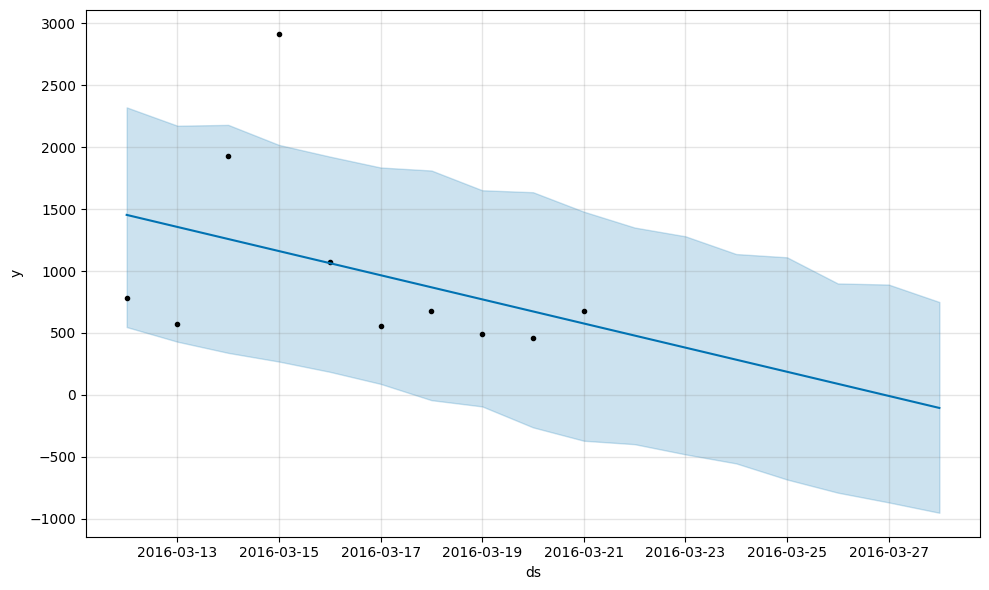

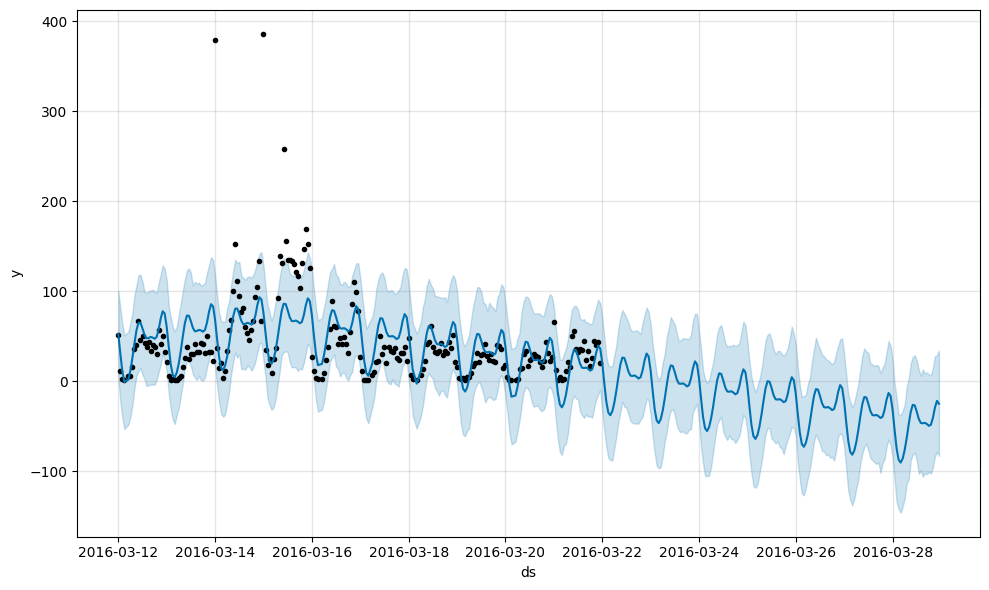

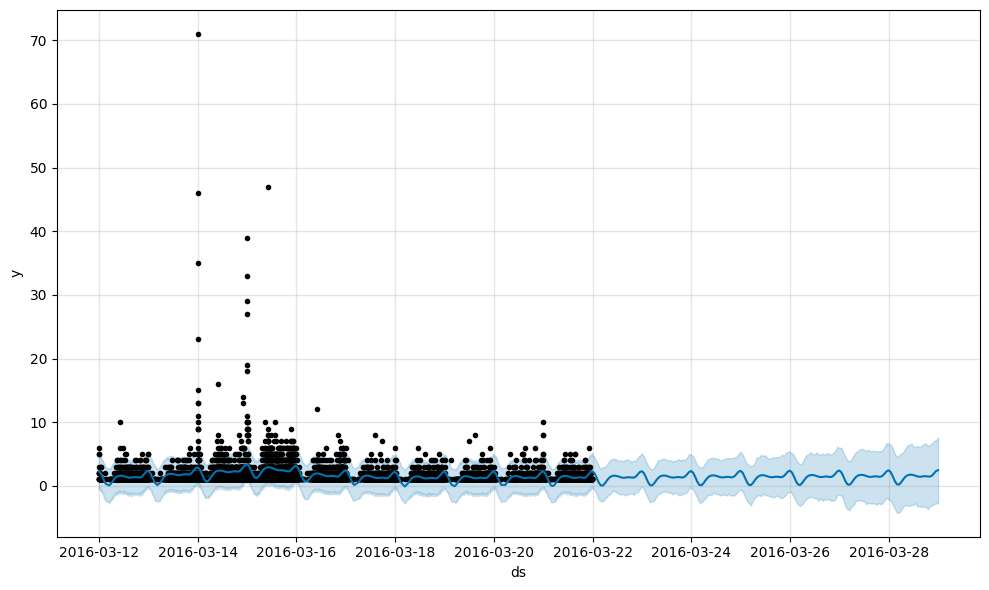

In [6]:
figs = list(
    model.plot(forecast) for (model, forecast) in zip(models, forecasts)
)

- write to csv

In [7]:
RES_PATH = ROOT / 'RES'
RES_PATH.mkdir(exist_ok=True)
for ts, forecast in zip(timeseries, forecasts):
    forecast.to_csv(RES_PATH / f'{ts}.csv')
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-12 00:00:00,1.256906,-0.336770,4.981328,1.256906,1.256906,0.991435,0.991435,0.991435,0.991435,0.991435,0.991435,0.0,0.0,0.0,2.248341
1,2016-03-12 00:01:00,1.256941,-0.586849,4.729988,1.256941,1.256941,0.989649,0.989649,0.989649,0.989649,0.989649,0.989649,0.0,0.0,0.0,2.246590
2,2016-03-12 00:02:00,1.256977,-0.333720,4.814485,1.256977,1.256977,0.987735,0.987735,0.987735,0.987735,0.987735,0.987735,0.0,0.0,0.0,2.244712
3,2016-03-12 00:03:00,1.257012,-0.585132,4.837004,1.257012,1.257012,0.985694,0.985694,0.985694,0.985694,0.985694,0.985694,0.0,0.0,0.0,2.242706
4,2016-03-12 00:04:00,1.257048,-0.231824,4.844529,1.257048,1.257048,0.983524,0.983524,0.983524,0.983524,0.983524,0.983524,0.0,0.0,0.0,2.240572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,2016-03-28 19:54:00,1.447330,-3.222442,6.443815,-2.679140,5.528049,-0.009491,-0.009491,-0.009491,-0.009491,-0.009491,-0.009491,0.0,0.0,0.0,1.437839
5616,2016-03-28 20:54:00,1.448459,-3.106585,6.592840,-2.723171,5.548136,0.138439,0.138439,0.138439,0.138439,0.138439,0.138439,0.0,0.0,0.0,1.586898
5617,2016-03-28 21:54:00,1.449588,-2.862246,7.034564,-2.767194,5.593229,0.480739,0.480739,0.480739,0.480739,0.480739,0.480739,0.0,0.0,0.0,1.930328
5618,2016-03-28 22:54:00,1.450718,-2.781177,7.197575,-2.810731,5.639189,0.858414,0.858414,0.858414,0.858414,0.858414,0.858414,0.0,0.0,0.0,2.309131


In [8]:
!tree $RES_PATH

/home/qdl/Desktop/FDU/分布式/DATA/RES
├── time-sale_day.csv
├── time-sale_hour.csv
└── time-sale_min.csv

0 directories, 3 files
